In [1]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

# Regularización

## Regresión Ridge

Podemos usar paquetes como `MASS` o `glmnet` 

In [2]:
# install.packages("Brq")
library(Brq)
data(Prostate)

Los datos aparecerán recogidos en un data.frame con 9 variables y 97 observaciones. El objetivo del estudio es determinar qué variables influyen en la presencia de un antígeno prostático específico (variable `lpsa`) para detectar el cáncer de próstata. Disponemos así como variables explicativas de medidas como el volumen del tumor (`lcavol`), el log.peso de la próstata (`lweight`), la edad (`age`), la cantidad de hiperplasia prostática benigna (`lbph`), el grado de inflación del tumor en la vesícula seminal (`svi`), el gradfo de penetración capsular (`lcp`) y el score de Gleason (`gleason` y `pgg45`). 

In [3]:
dim(Prostate)
head(Prostate)

[1] 97  9

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678


Proponemos un modelo de regresión lineal para explicar la variable `lpsa` en función del resto de marcadores clínicos ($p = 8$). 
\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p + \epsilon
\end{equation}

En primer lugar, selecciona las observaciones correspondientes a la muestra de entrenamiento. 

Ajusta un modelo de regresión lineal que explique la variable `lpsa` en función del resto de variables del modelo, utilizando el método de estimación de mínimos cuadrados (OLS). Recuerda que estimador por el método de mínimos cuadrados de los parámetros $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_p)^T$ se obtienen resolviendo el problema de optimización: 
\begin{equation}
\underset{\beta}{\text{Minimizar}} \sum_{i = 1}^n (y_i - \beta_0 - \beta_1x_{i1} - \dots - \beta_p x_{ip})^2
\end{equation}

| | intercept | lcavol | lweight | age 1 | lbph | svi | lcp | gleason | pgg45 |
|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
| OLS | 0.6694 | 0.5870 | 0.4545 | -0.0196 | 0.1071 | 0.7662 | -0.1055 | 0.0451| 0.0045 | 

In [4]:
# estimacion de minimos cuadrados
lm(lpsa ~ ., data = Prostate)


Call:
lm(formula = lpsa ~ ., data = Prostate)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
   0.669399     0.587023     0.454461    -0.019637     0.107054     0.766156  
        lcp      gleason        pgg45  
  -0.105474     0.045136     0.004525  


Ajustaremos ahora el mismo modelo de regresión lineal mediante el procedimiento de estimación Ridge. Recuerda que en este caso, los parámetros $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_p)^T$ se obtienen resolviendo el problema de optimización 
\begin{equation}
\underset{\beta}{\text{Minimizar}} \quad \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2 + \lambda \sum_{j = 1}^p \beta_j^2
\end{equation}

La solución del problema depende del valor de $\lambda$ seleccionado. En particular, para $\lambda = 0$ el problema se reduce al estimador ordinario de mínimos cuadrados. Para realizar el ajuste mediante el procedimiento de estimación Ridge con R, usamos la función `lm.ridge` del paquete `MASS`. Observa que la sintaxis es similar a la de la función `lm`, añadiendo el argumento `lambda` con el valor de la penalización $\lambda$ que queramos considerar.

In [5]:
library(MASS)
rr <- lm.ridge(lpsa ~ ., lambda = 0, data = Prostate)

# se estandariza las variables
rr$coef 
# en escala original, coincide con lm
coef(rr) 

lcavol     lweight         age        lbph         svi         lcp 
 0.68830414  0.22453268 -0.14544574  0.15451249  0.31554540 -0.14671621 
    gleason       pgg45 
 0.03242577  0.12697278

lcavol      lweight          age         lbph          svi 
 0.669399027  0.587022881  0.454460641 -0.019637208  0.107054351  0.766155885 
         lcp      gleason        pgg45 
-0.105473570  0.045135964  0.004525324

En cuanto a los parámetros estimados, debemos distinguir entre el resultado almacenado en `rr$coef` y los valores que nos devuelve `coef(rr)`. Puedes observar que el resultado de `coef(rr)` coincide con el obtenido por el método de mínimos cuadrados. La diferencia con respecto a los valores almacenados en `rr$coef` es que estos no están en la escala original. Son los coeficientes que se obtienen de ajustar el modelo de regresión a las variables predictoras estandarizadas (`coef(rr)`). Es decir, coincidirían con los resultados de ajustar el modelo de regresión lineal por el método de mínimos cuadrados a los datos que se obtienen tras restar a cada columna de la matriz $\mathbf{x}$ su media y dividir entre la desviación típica. Para comprobarlo, puedes utilizar la función `scale(x, center = TRUE, scale = TRUE)`, que estandariza una matriz de datos por columnas. 

A continuación realizamos el ajuste mediante el procedimiento de estimación Ridge, usando diferentes valores del parámetro $\lambda$. Recuerda que el incremento del valor de $\lambda$ implica la contracción del vector $(\hat{\beta}_1, \dots, \hat{\beta}_p)^T$

In [6]:
lam <- seq(0, 10, by = 0.01)
rr <- lm.ridge(lpsa ~ ., lambda = lam, data = Prostate)

# matriz donde las filas recogen los parametros estimados para cada valor de lambda
coef(rr)

,,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0.00,0.6693990,0.5870229,0.4544606,-0.01963721,0.1070544,0.7661559,-0.1054736,0.04513596,0.004525324
0.01,0.6689995,0.5868907,0.4544480,-0.01962951,0.1070340,0.7660194,-0.1053449,0.04517216,0.004522978
0.02,0.6686006,0.5867586,0.4544353,-0.01962181,0.1070137,0.7658831,-0.1052164,0.04520830,0.004520635
0.03,0.6682021,0.5866266,0.4544226,-0.01961413,0.1069934,0.7657468,-0.1050880,0.04524439,0.004518296
0.04,0.6678042,0.5864946,0.4544098,-0.01960644,0.1069731,0.7656107,-0.1049598,0.04528041,0.004515960
0.05,0.6674068,0.5863628,0.4543971,-0.01959877,0.1069528,0.7654747,-0.1048316,0.04531639,0.004513628
0.06,0.6670099,0.5862311,0.4543843,-0.01959109,0.1069325,0.7653388,-0.1047036,0.04535230,0.004511299
0.07,0.6666135,0.5860995,0.4543715,-0.01958343,0.1069122,0.7652031,-0.1045758,0.04538816,0.004508974
0.08,0.6662177,0.5859680,0.4543587,-0.01957576,0.1068920,0.7650674,-0.1044480,0.04542397,0.004506651
0.09,0.6658224,0.5858365,0.4543459,-0.01956811,0.1068717,0.7649319,-0.1043204,0.04545972,0.004504333


Puedes observar que ahora `coef(rr)` nos devuelve una matriz donde las filas recogen los parámetros estimados para cada valor de $\lambda$. 

Otro de los paquetes de R que nos permite realizar un ajuste lineal mediante el procedimiento de estimación Ridge es el paquete `glmnet`. Este paquete es uno de los más utilizados en el contexto de regresión regularizada, ya que implementa en una única función (la función `glmnet`) distintos tipos de penalización. Veremos como es el uso de la función `glmnet` para regresión Ridge.

In [7]:
#install.packages("glmnet")
library(glmnet)

y <- Prostate$lpsa
x <- Prostate[,-9]
# Regresion cuasi-ridge: alpha=0
rr_glmnet <- glmnet(x, y, alpha = 0, lambda = 0)
coef(rr_glmnet)

Cargando paquete requerido: Matrix

Loaded glmnet 4.1-8



9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  0.667514485
lcavol       0.586983973
lweight      0.454630898
age         -0.019639964
lbph         0.107017836
svi          0.766095738
lcp         -0.105508227
gleason      0.045365684
pgg45        0.004523291

El argumento `alpha` nos permite especificar el tipo de regularización que deseamos usar (`alpha = 0` para Ridge). De nuevom el argumento `lambda` corresponde al parámetro de penalización. Puedes observar con `coef(rr_glmnet)` que, como era de esperar, volvemos a obtener los mismos coeficientes estimados que con el ajuste por mínimos cuadrados. Usando diferentes valores del parámetro $\lambda$:

(Intercept)      lcavol     lweight         age        lbph         svi 
1.633008538 0.065284440 0.076998002 0.001778795 0.013163439 0.136841313 
        lcp     gleason       pgg45 
0.036936968 0.045226964 0.001339948

[1] 9.91

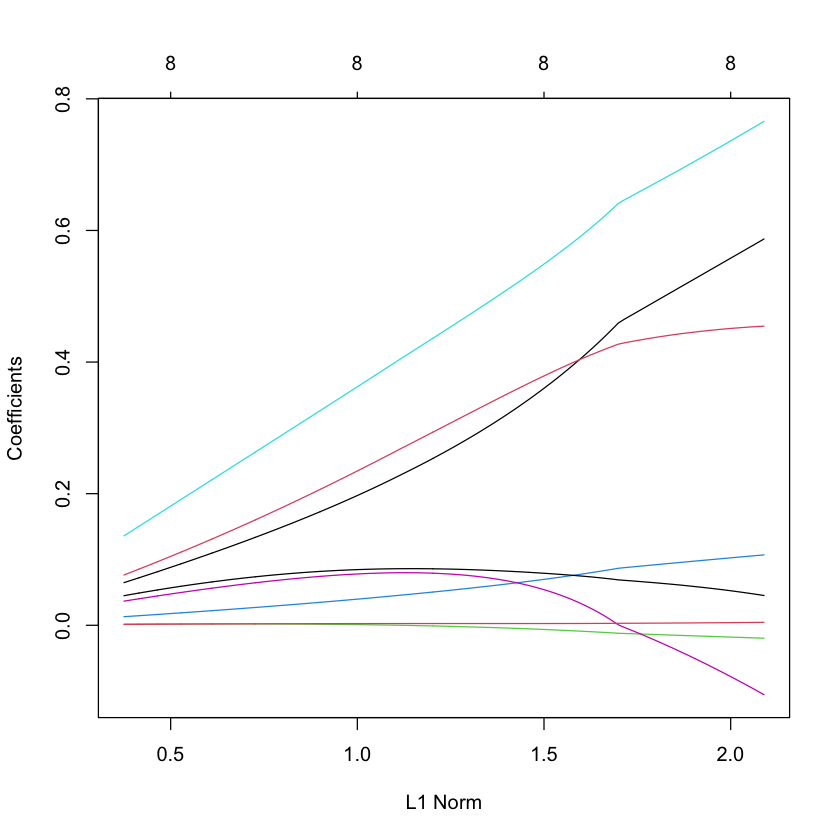

In [8]:
lam <- seq(0, 10, by = 0.01)
rr_glmnet2 <- glmnet(x, y, alpha = 0, lambda = lam)

# no tenemos los mismos coeficientes, porque no es exactamente Ridge
coef(rr_glmnet2)[,10]
rr_glmnet2$lambda[10]
plot(rr_glmnet2) # visualizar los coeficientes del modelo

In [9]:
# Alternativa si queremos buscar un lambda en concreto
coef(rr_glmnet2,s=9.91)

rownames(coef(rr))[992]
coef(rr)[992,]

9 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 1.633008538
lcavol      0.065284440
lweight     0.076998002
age         0.001778795
lbph        0.013163439
svi         0.136841313
lcp         0.036936968
gleason     0.045226964
pgg45       0.001339948

[1] " 9.91"

lcavol      lweight          age         lbph          svi 
 0.434328293  0.489360565  0.436600993 -0.013888954  0.091594316  0.669562898 
         lcp      gleason        pgg45 
-0.020779939  0.064988765  0.003238713

Ahora, `coef(rr_glmnet2)` nos devuelve una matriz donde las columnas recogen los parámetros estimados para cada valor de $\lambda$ (las estimaciones se devuelven en la escala original). Fijate que `coef(rr_glmnet)[,j]` son las estimaciones para el valor de $\lambda$ en `rr_glmnet2$lambda[j]`. Además, es importante mencionar que el problema de optimización que resuelve la función `glmnet`para Ridge es:
\begin{equation}
\underset{\beta}{\text{Minimizar}} \quad\frac{1}{2n}\sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2 + \frac{\lambda}{2} \sum_{j = 1}^p \beta_j^2
\end{equation}

Observa que no coincide exactamente con la formulación original del problema, y esto hace que un mismo valor de $\lambda \neq 0$ no devuelva los mismos estimadores con la función `lm.ridge` y `glmnet`. Aún así, el papel de $\lambda$ como parámetro de penalización es el mismo, como se observa en la siguiente gráfica, que muestra las estimaciones de los parámetros a medida que aumenta $\lambda$.

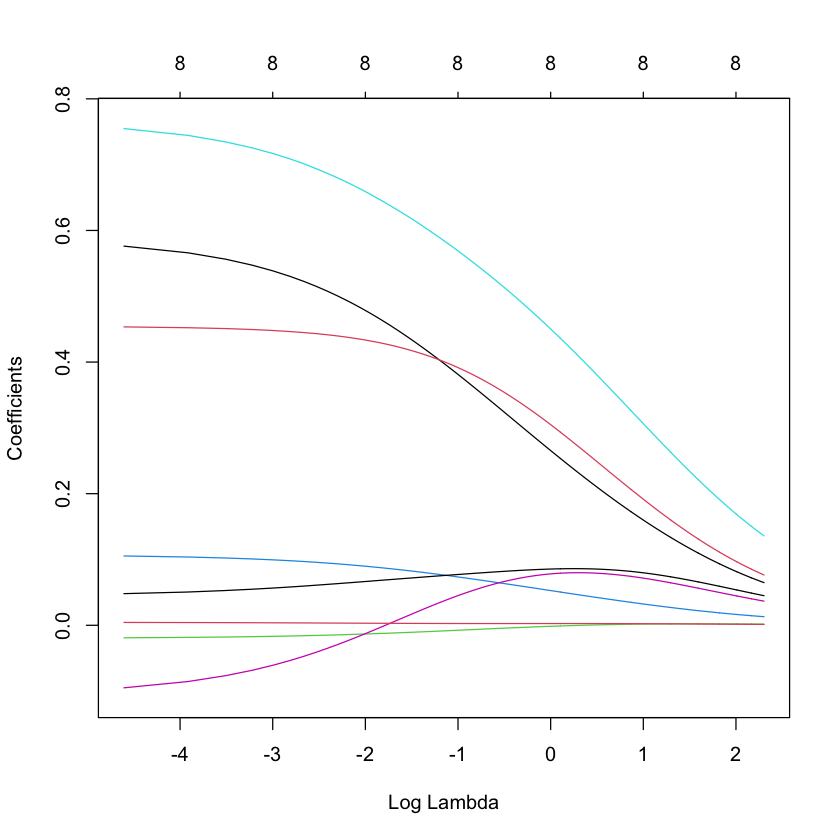

In [10]:
plot(rr_glmnet2, xvar = "lambda")

## Regresión Lasso (least absolute shrinkage and selection operator)

Al igual que ocurre con la regularización Ridge, son varios los paquetes de R que implementan el método de regularización Lasso. nosotros realizaremos el ajuste con la función `glmnet` que, como hemos dicho, implementa distintos tipos de penalización dependiendo del valor del argumento `alpha` que seleccionemos. Antes de realizar el ajuste, recordemos que en este caso los parámetros $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_p)^T$ se obtienen resolviendo el problema de optimización 
\begin{equation}
\underset{\beta}{\text{Minimizar}} \quad \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2 + \lambda \sum_{j = 1}^p |\beta_j|
\end{equation}

Ajustamos el modelo con la función `glmnet`

In [11]:
# regresion cuasi-lasso: alpha=1
# si 0 < alpha < 1, se obtiene una combinacion de ambas penalizaciones
# si lambda = 0, ambas devuelven el mismo resultado
lasso <- glmnet(x, y, alpha = 1, lambda = 0)
coef(lasso)
coef(rr_glmnet)

9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  0.667514485
lcavol       0.586983973
lweight      0.454630898
age         -0.019639964
lbph         0.107017836
svi          0.766095738
lcp         -0.105508227
gleason      0.045365684
pgg45        0.004523291

9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  0.667514485
lcavol       0.586983973
lweight      0.454630898
age         -0.019639964
lbph         0.107017836
svi          0.766095738
lcp         -0.105508227
gleason      0.045365684
pgg45        0.004523291

El argumento `alpha` nos permite especificar el tipo de regularización que deseamos usar (`alpha = 1` para Lasso, `alpha = 0` para Ridge, $0 <$ `alpha` $< 1$ para una combinación de ambas penalizaciones). Al igaul que antes, el argumento `lambda` corresponde al parámetro de penalización y, de nuevo, `coef(lasso)` nos devuelve los coeficientes estimados que coinciden con los obtenidos por el ajuste por mínimos cuadrados. Usando diferentes valores del parámetro $\lambda$:

In [12]:
lam = seq(0, 10, by = 0.01)
lasso2 <- glmnet(x, y, alpha = 1, lambda = lam)
coef(lasso2)[,950]
lasso2$lambda[950]

(Intercept)      lcavol     lweight         age        lbph         svi 
  2.0944915   0.2843649   0.0000000   0.0000000   0.0000000   0.0000000 
        lcp     gleason       pgg45 
  0.0000000   0.0000000   0.0000000

[1] 0.51

Ahora, `coef(lasso)` nos devuelve una matriz donde las columnas recogen los parámetros estimados para cada valor de $\lambda$ (las estimaciones se devuelven en la escala original). La función que minimiza `glmnet` para Lasso es 
\begin{equation}
\underset{\beta}{\text{Minimizar}} \quad \frac{1}{2n}\sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \dots - \beta_p x_{ip})^2 + \lambda \sum_{j = 1}^p |\beta_j|
\end{equation}

Representamos las estimaciones obtenidas en función de la norma $L_1$ del vector de parámetros estimados y en función del logarítmo de $\lambda$

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


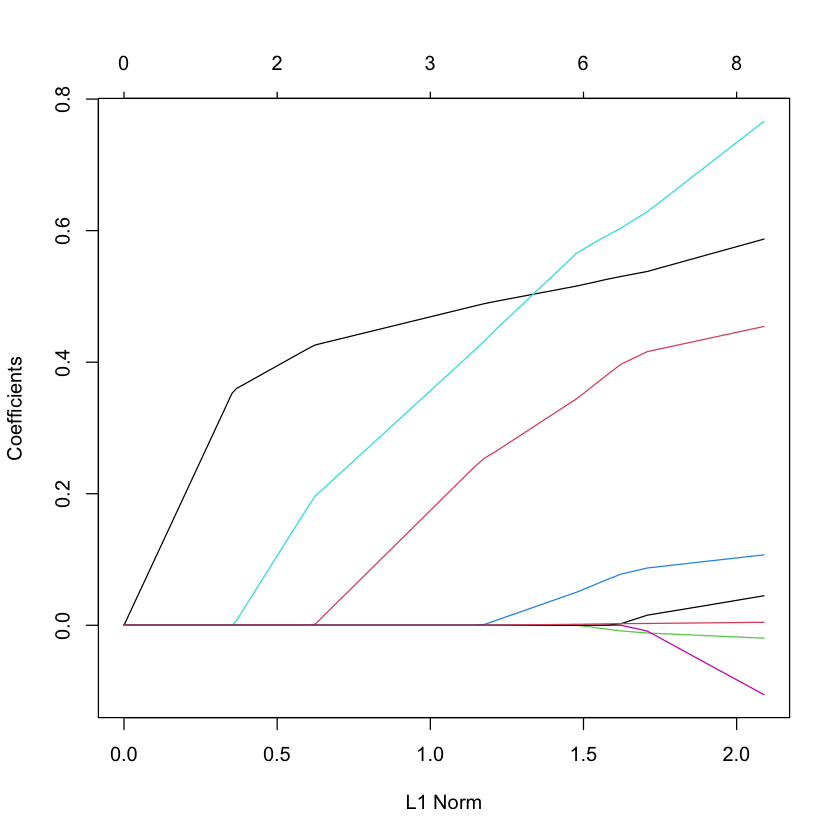

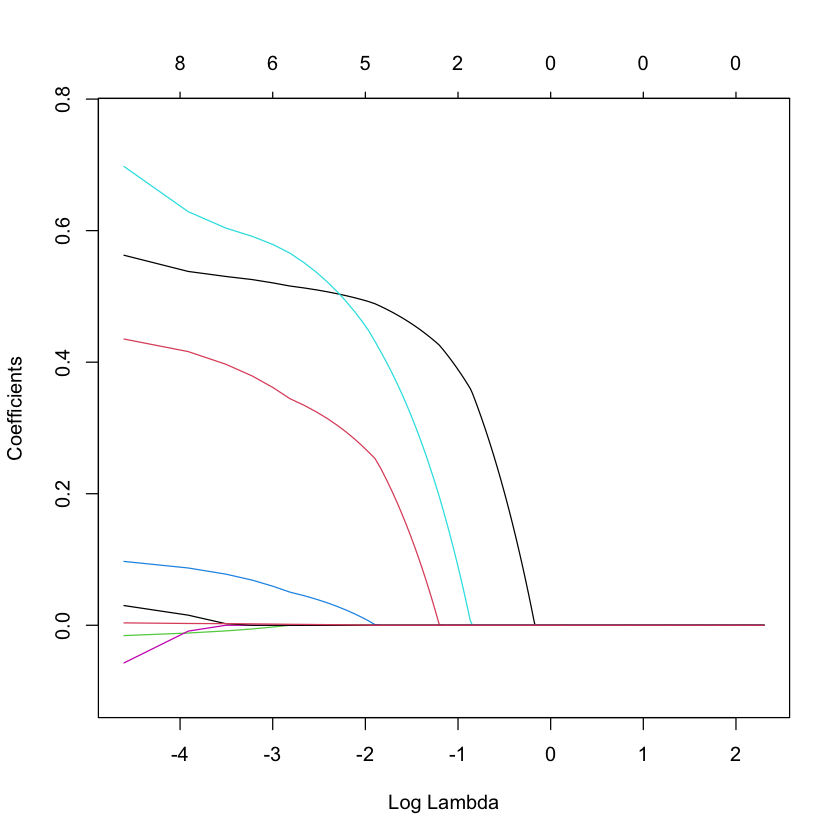

In [13]:
plot(lasso2)
plot(lasso2, xvar = "lambda")

## Selección del parámetro de penalización

Tanto el método de regularización Ridge como el Lasso, requieren un método para la selección del parámetro de penalización $\lambda$ adecuado. Uno dde los métodos más utilizados para este propósito es la validación cruzada. El proceso fija un rango de posibles valores $\lambda$ y ajusta el modelo para cada $\lambda$ utilizando una parte de la muestra de entrenamiento (un subconjunto de observaciones se apartó previamente). A continuación se analiza la capacidad predictiva del modelo sobre el conjunto de observaciones apartado (muestra de validación). Para ello, es habitual calcular el error cuadrático medio (MSE) en la muestra de validación, es decir, 
\begin{equation}
\frac{1}{n_v} \sum_{i = 1}^{n_v} (y_i - \hat{y}_i)^2
\end{equation}

donde $n_v$ es el tamaño de la muestra de validación, $y_i$ son las observaciones de la muestra de validación e $\hat{y}_i$ son las predicciones dadas por el modelo ajustado. El $\lambda$ óptimo es aquel para el cual el MSE sea menor. 

Como este método depende en gran medida de qué observaciones se incluyen en la muestra para ajustar los modelos y cuáles en la muestra de validación, se han desarrollado otros métodos de validación cruzada.

Por ejemplo, la validación cruzada de $k$ iteraciones (\textit{k-fold cross-validation}) divide la muestra de entrenamiento en $k$ subconjuntos de tamaño similar. En la primera etapa, se utiliza el primer subconjunto como muestra de validación, se ajusta el modelo en los $k - 1$ subconjuntos restantes y se calcula el $\text{MSE}_1$ en la muestra de validación. A continuación se utiliza el segundo subconjunto como muestra de validación, se ajusta el modelo en los $k - 1$ subconjuntos restantes y se calcula el $\text{MSE}_2$ en la muestra de validación. Por último, una vez repetido el mismo proceso para los $k$ subconjuntos, se calcula la media aritmética de los $\text{MSE}_i$, con $i = 1, \dots, k$. El error obtenido se denomina error de validación cruzada y el $\lambda$ óptimo es aquel para el cual el error de validación cruzada sea menor. Un caso particular de validación cruzada de $k$ iteraciones es $k = n$ (\textit{Leave-one-out cross-validation}), donde las muestras de validación en cada iteración están formadas por una única observación.

La función `cv.glmnet` realiza la validación cruzada de $k$ iteraciones para `glmnet` y nos devuelve el valor óptimo de $\lambda$ según este criterio. Veamos cómo se ejecuta en primer lugar para la regularización Ridge. 

In [14]:
lam = seq(0, 10, by = 0.01)
# validacion cruzada de k-iteraciones (por defecto k = 10)
cvout <- cv.glmnet(as.matrix(x), y, alpha = 0, lambda = lam)

La función `cv.glmnet` usa por defecto $k = 10$. El valor $\lambda$ que optimizael error de validación cruzada se encuentra almacenado en `cvout$lambda.min` y los parámetros obtenidos al ajustar el modelo de regresión con regularización Ridge para ese valor de $\lambda$ se obtienen directamente con la función `coef`, como se muestra a continuación 

In [15]:
# lambda estimado
cvout$lambda.min
# coeficientes para ese lambda
coef(cvout, s = "lambda.min")

[1] 0.08

9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.483694672
lcavol       0.514788558
lweight      0.443162085
age         -0.015392462
lbph         0.095655551
svi          0.693559333
lcp         -0.040696465
gleason      0.060991605
pgg45        0.003492147

La función también devuelve el valor `cvout$lambda.1se`, que representa un valor de $\lambda$ para un modelo más simple que el de `cvout$lambda.min` , pero cuyo error está a una desviación estándar del mejor. 

Del mismo modo, si queremos seleccionar el parámetro $\lambda$ en el ajuste Lasso, haremos

In [57]:
lam = seq(0, 10, by = 0.01)
cvout1 <- cv.glmnet(as.matrix(x), y, alpha = 1, lambda = lam)
cvout1$lambda.min
coef(cvout1, s = "lambda.min")
cvout1$lambda.1se
coef(cvout1, s = "lambda.1se")

[1] 0.03

9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.646375629
lcavol       0.530328057
lweight      0.396877894
age         -0.008585523
lbph         0.077774752
svi          0.603925320
lcp          .          
gleason      0.002404276
pgg45        0.002457964

[1] 0.19

9 x 1 sparse Matrix of class "dgCMatrix"
                   s1
(Intercept) 1.0760188
lcavol      0.4721864
lweight     0.1875638
age         .        
lbph        .        
svi         0.3686004
lcp         .        
gleason     .        
pgg45       .        

In [48]:
predicciones <- cv.glmnet(as.matrix(x), y, alpha = 1, lambda = lam) %>% predict(newx = as.matrix( x[1:5,]), type = "response", s = "lambda.min")
predicciones

,lambda.min
1,1.0054927
2,0.9725394
3,1.0381264
4,0.8536639
5,1.8991820


In [58]:
library(glmnet)
library(magrittr)

predicciones <- cv.glmnet(as.matrix(x), y, alpha = 1, lambda = lam) %T>%
  { cat("Lambda mínimo: ", .$lambda.min) } %>%
  predict(newx = as.matrix(x[1:5, ]), type = "response", s = "lambda.min")

predicciones

Lambda mínimo:  0.04

,lambda.min
1,0.9247421
2,0.8705892
3,0.8401255
4,0.7464144
5,1.8083502


Mostramos a continuación una gráfica de los parámetros estimados con Lasso junto con el valor de $\lambda$ seleccionado por validación cruzada (el valor óptimo `cvout$lambda.min` y `cvout$lambda.1se`)

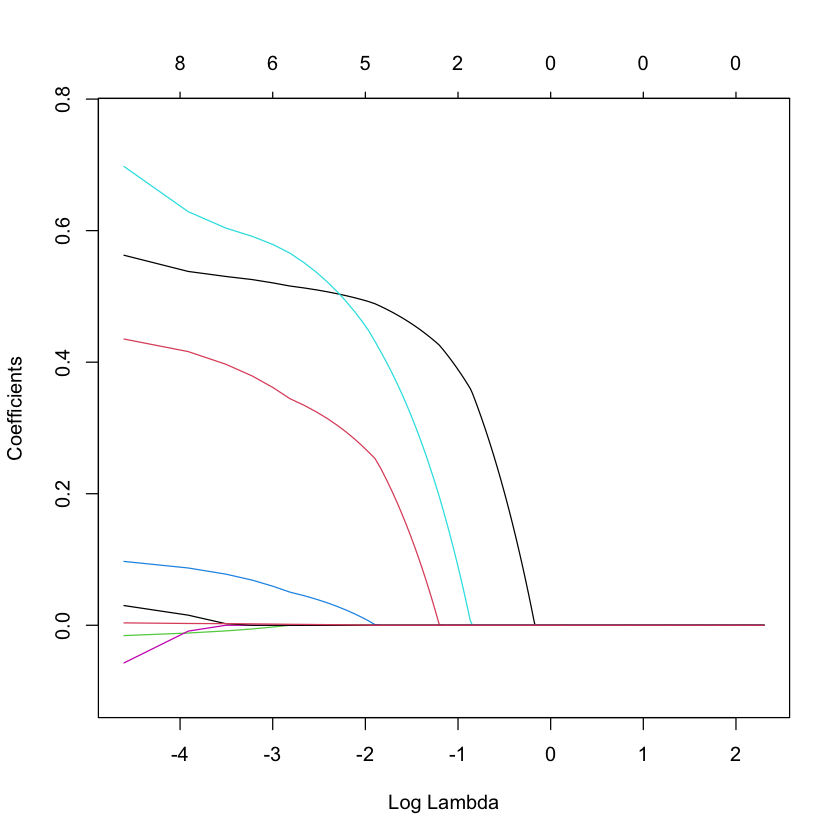

In [20]:
plot(lasso2, xvar = "lambda")

También podemos hacer predicciones con el modelo entrenado. Veamos predicciones cuando $\lambda = 0.5$ de las primeras 5 observaciones

In [18]:
predict(lasso2, newx = as.matrix( x[1:5,]), type = "response", s = 0.5)

,s1
1,1.913153
2,1.791768
3,1.933360
4,1.730342
5,2.303063


En resumen, si seleccionamos como valores de $\lambda$ los dados por `cvout$lambda.1se` (Ridge) y `cvout$lambda.1se` (Lasso), los parámetros estimados con mínimos cuadrados, Ridge y Lasso son los que se muestran en la tabla siguiente
<div style="text-align: center;">

| | OLS | Ridge | Lasso |
|--|--|--|--|
| intercept | 0.6694 | 0.3470 | 1.2882 |
| lcavol | 0.5870 | 0.2803 | 0.4596 |
| lweight | 0.4545 | 0.3183 | 0.1369 |
| age | -0.0196 | -0.0022 | 0 |
| lbph | 0.1071 | 0.0555 | 0 |
| svi | 0.7662 | 0.4671 | 0.3216 |
| lcp | -0.1055 | 0.0762 | 0 |
| gleason | 0.0451 | 0.0848 | 0 |
| pgg45 | 0.0045 | 0.0027 | 0 |

</div>